In [13]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

prices = pd.read_csv('../data/sector_prices.csv', index_col=0, parse_dates=True)
sector = 'XLK'
series = prices[sector].dropna().asfreq('B').ffill()


In [17]:
model = sm.tsa.ARIMA(series, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)
print(forecast)

2025-08-06    261.199849
2025-08-07    261.072768
2025-08-08    261.128486
2025-08-11    261.104056
2025-08-12    261.114768
2025-08-13    261.110071
2025-08-14    261.112130
2025-08-15    261.111228
2025-08-18    261.111623
2025-08-19    261.111450
2025-08-20    261.111526
2025-08-21    261.111493
2025-08-22    261.111507
2025-08-25    261.111501
2025-08-26    261.111504
2025-08-27    261.111502
2025-08-28    261.111503
2025-08-29    261.111503
2025-09-01    261.111503
2025-09-02    261.111503
2025-09-03    261.111503
2025-09-04    261.111503
2025-09-05    261.111503
2025-09-08    261.111503
2025-09-09    261.111503
2025-09-10    261.111503
2025-09-11    261.111503
2025-09-12    261.111503
2025-09-15    261.111503
2025-09-16    261.111503
Freq: B, Name: predicted_mean, dtype: float64


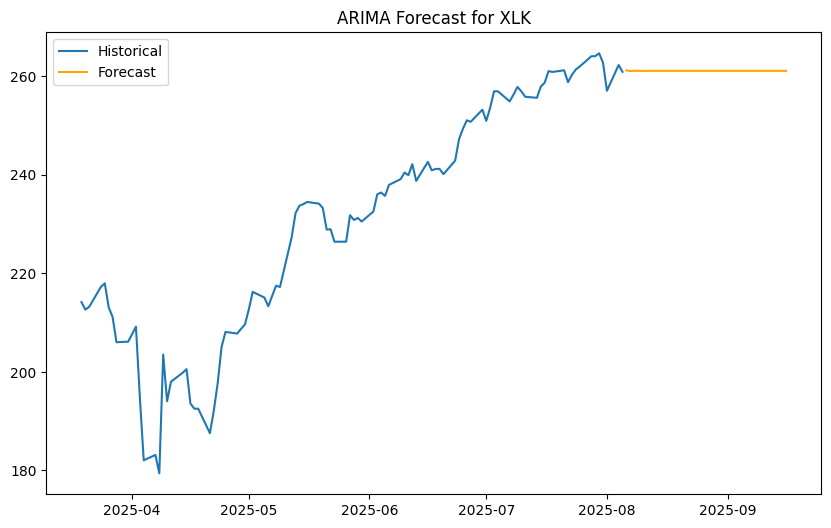

In [16]:
last_date = series.index[-1]
future_dates = pd.bdate_range(last_date + pd.Timedelta(days=1), periods=30)

plt.figure(figsize=(10,6))
plt.plot(series[-100:], label='Historical')
plt.plot(future_dates, forecast, label='Forecast', color='orange')
plt.title(f"ARIMA Forecast for {sector}")
plt.legend()
plt.show()